## Import Libraries

In [278]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import numpy as np
from datetime import datetime

## Load Dataset

In [279]:
df = pd.read_csv('E-commerce Dataset.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Inspect the Dataset

In [241]:
# Check data type of each column
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [275]:
# Find the date range of the dataset
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

print(f"\nMin Date: {min_date}")
print(f"Max Date: {max_date}")


Min Date: 2010-12-01 08:26:00
Max Date: 2011-12-09 12:50:00


In [243]:
# Check unique values for categorical columns
print("Unique Products:", df['Description'].nunique())
print("Unique Countries:", df['Country'].nunique())

print(df['Country'].unique())

Unique Products: 4223
Unique Countries: 38
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [244]:
# Descriptive statistics for numerical columns
summary = df.describe()
print(summary.round(2))

        Quantity  UnitPrice  CustomerID
count  541909.00  541909.00   406829.00
mean        9.55       4.61    15287.69
std       218.08      96.76     1713.60
min    -80995.00  -11062.06    12346.00
25%         1.00       1.25    13953.00
50%         3.00       2.08    15152.00
75%        10.00       4.13    16791.00
max     80995.00   38970.00    18287.00


- The dataset shows a wide range of Quantities and Prices, with some extreme values. 
- Negative values in Quantity and UnitPrice might indicate returns or refunds.

In [245]:
# Count for Quantity
quantity_positive = (df['Quantity'] > 0).sum()
quantity_negative = (df['Quantity'] < 0).sum()
quantity_zero = (df['Quantity'] == 0).sum()

# Count for UnitPrice
unitprice_positive = (df['UnitPrice'] > 0).sum()
unitprice_negative = (df['UnitPrice'] < 0).sum()
unitprice_zero = (df['UnitPrice'] == 0).sum()

# Display the counts for each condition
print(f"Quantity > 0: {quantity_positive} entries")
print(f"Quantity < 0: {quantity_negative} entries")
print(f"Quantity = 0: {quantity_zero} entries")

print(f"UnitPrice > 0: {unitprice_positive} entries")
print(f"UnitPrice < 0: {unitprice_negative} entries")
print(f"UnitPrice = 0: {unitprice_zero} entries")

Quantity > 0: 531285 entries
Quantity < 0: 10624 entries
Quantity = 0: 0 entries
UnitPrice > 0: 539392 entries
UnitPrice < 0: 2 entries
UnitPrice = 0: 2515 entries


- A very small number of entries have a negative Unit Price. These could be errors in the dataset (e.g., incorrect price entries) and might need to be investigated or cleaned.
- Some entries have a Unit Price of zero, which could mean free products, promotional items, or data issues (e.g., missing prices).

In [246]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The output indicates that the CustomerID column has a significant number of missing values. This could be causing issues when performing aggregation or calculations involving CustomerID.

In [281]:
# Check out few rows with missing CustomerID
missing_customer_data = df[df['CustomerID'].isnull()]
missing_customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


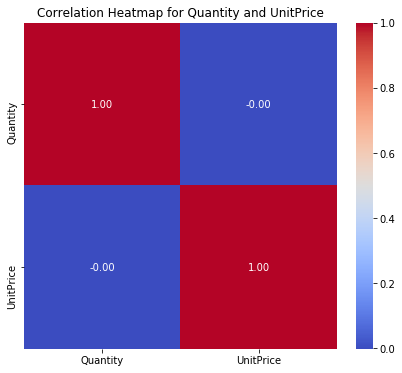

In [248]:
# Correlation matrix
correlation_matrix = df[['Quantity', 'UnitPrice']].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Quantity and UnitPrice")
plt.show()

## Data Preprocessing

In [282]:
# Fill missing CustomerID with 0
df['CustomerID'] = df['CustomerID'].fillna(0)
# Fill missing Description with 'Unknown'
df['Description'].fillna('Unknown', inplace=True)

# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")
# Convert 'CustomerID' column to integer
df['CustomerID'] = df['CustomerID'].astype('Int64', errors='ignore')

# Check data after cleaning
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# 📊 Sales Trend Analysis 📊

## Calculate key metrics

In [283]:
# 1. Revenue (Total Sales)
revenue = (df['Quantity'] * df['UnitPrice']).sum()

# 2. Average Order Value (AOV)
total_orders = df['InvoiceNo'].nunique()  # Total number of unique orders
aov = revenue / total_orders  # Average Order Value

# 3. Average Orders per Customer
total_customers = df['CustomerID'].nunique()  # Total unique customers
avg_orders_per_customer = total_orders / total_customers  # Average orders per customer

# 4. Customer Lifetime Value (CLV)
clv = aov * avg_orders_per_customer

print(f"Revenue: ${revenue / 1_000_000:.2f}M")
print("Total Sales Transactions:", total_orders)
print("Total Unique Customers:", df['CustomerID'].nunique())
print("Total Quantity Sold: {:.2f}M".format(df['Quantity'].sum() / 1_000_000))
print(f"Customer Lifetime Value (CLV): ${clv / 1_000:.2f}k")
print(f"Average Order Value (AOV): ${aov:,.2f}")
print(f"Average Orders per Customer: {avg_orders_per_customer:.2f}")

Revenue: $9.75M
Total Sales Transactions: 25900
Total Unique Customers: 4373
Total Quantity Sold: 5.18M
Customer Lifetime Value (CLV): $2.23k
Average Order Value (AOV): $376.36
Average Orders per Customer: 5.92


## Monthly revenue trends

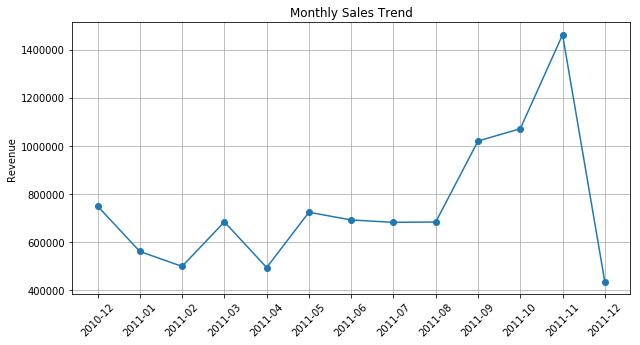

In [284]:
# Extract year-month from 'InvoiceDate'
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Create a new 'Revenue' column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Calculate monthly revenue
monthly_sales = df.groupby(df['InvoiceMonth'])['Revenue'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales, marker='o')
plt.xticks(rotation=45, ticks=monthly_sales.index.astype(str))
plt.ylabel("Revenue")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

## Top 10 Best-Selling Products

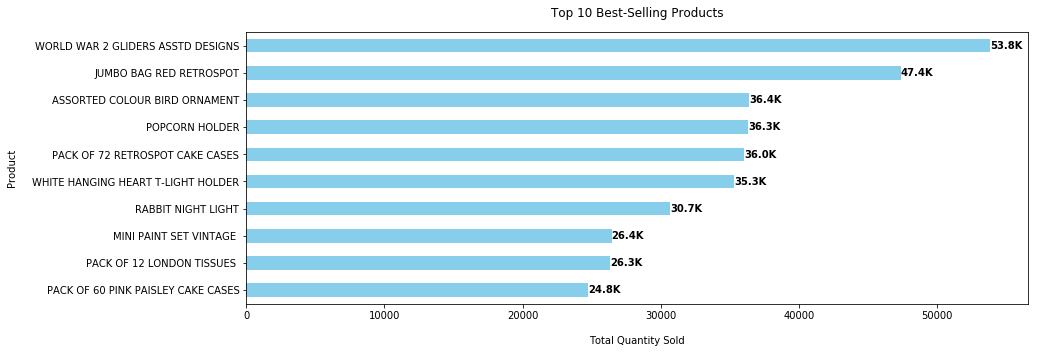

In [164]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(14, 5), color='skyblue')

for index, value in enumerate(top_products):
    plt.text(value, index, f'{value/1000:.1f}K', va='center', ha='left', color='black', fontweight='bold')

plt.xlabel("Total Quantity Sold", labelpad=15)
plt.ylabel("Product", labelpad=15)
plt.title("Top 10 Best-Selling Products", pad=15)
plt.gca().invert_yaxis()  # Highest selling product at the top
plt.show()

## Top 10 Countries by Sales

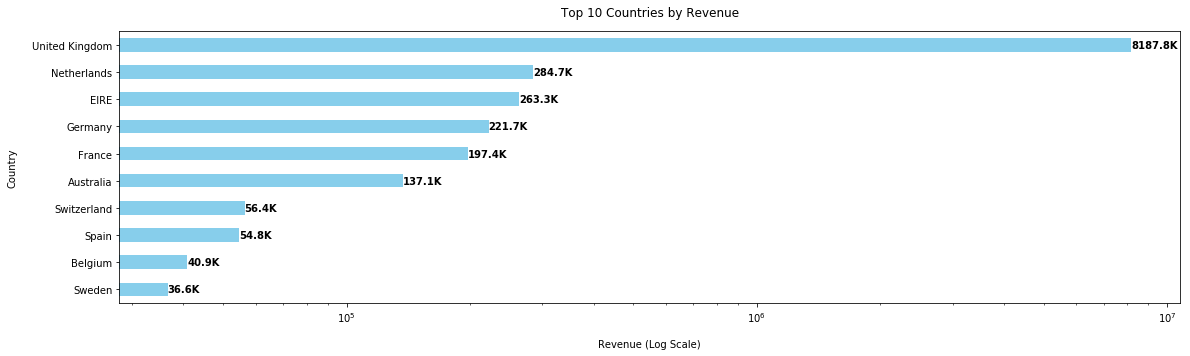

In [165]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(19, 5))
top_countries.plot(kind='barh', color='skyblue')

for index, value in enumerate(top_countries):
    plt.text(value, index, f'{value/1000:.1f}K', va='center', ha='left', color='black', fontweight='bold')

plt.xscale('log')  # Apply log scale to x-axis
plt.xlabel("Revenue (Log Scale)", labelpad=15)
plt.ylabel("Country", labelpad=15)
plt.title("Top 10 Countries by Revenue", pad=15)
plt.gca().invert_yaxis()  # Highest revenue at the top

plt.show()

### Country vs. Monthly Sales

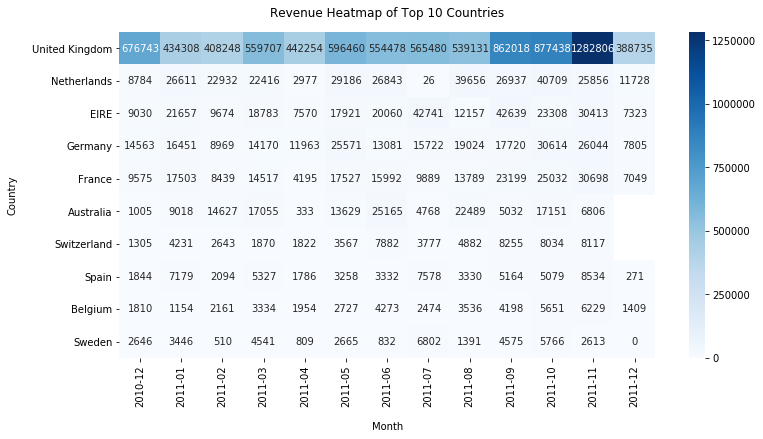

In [168]:
# Calculate monthly revenue by country
monthly_revenue = df.groupby([df['InvoiceDate'].dt.to_period("M"), 'Country'])['Revenue'].sum().unstack()

# Filter for the top 10 countries by revenue
top_country_revenue = monthly_revenue[top_countries.index]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(top_country_revenue.T, cmap="Blues", annot=True, fmt=".0f")

plt.xlabel("Month", labelpad=15)
plt.ylabel("Country", labelpad=15)
plt.title("Revenue Heatmap of Top 10 Countries", pad=15)

plt.show()

# 📊 Customer Analysis 📊

## Unique Customer by Country

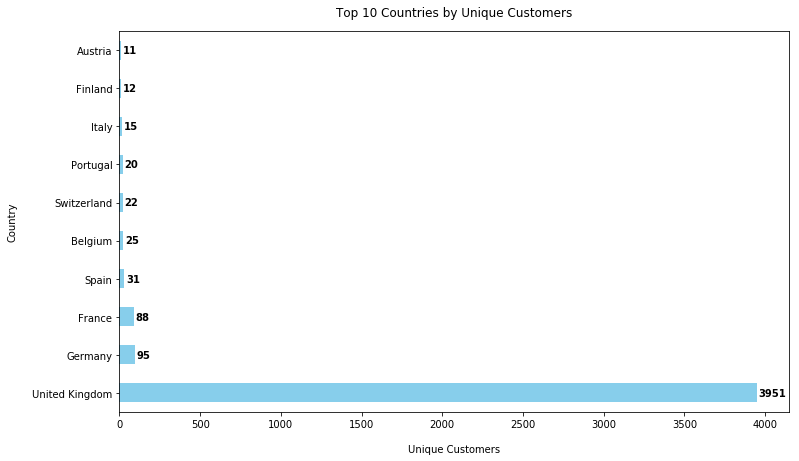

In [190]:
# Top 10 countries with the most unique customers
unique_customers_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
top_countries = unique_customers_by_country.head(10)

# Plotting the top 10 countries
plt.figure(figsize=(12, 7))
ax = top_countries.plot(kind='barh', color='skyblue')

# Adding data labels
for index, value in enumerate(top_countries):
    ax.text(value + 10, index, f'{value:.0f}', va='center', ha='left', fontsize=10, fontweight='bold')

plt.xlabel('Unique Customers', labelpad=15)
plt.ylabel('Country', labelpad=15)
plt.title('Top 10 Countries by Unique Customers', pad=15)
plt.yticks(fontsize=10)

plt.show()

## Top 10 Customers by Revenue

In [258]:
customer_revenue = df.groupby('CustomerID')['Revenue'].sum() # Revenue per customer
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique() # Total orders per customer
customer_aov = customer_revenue / customer_orders #AOV per customer
customer_clv = customer_aov * avg_orders_per_customer # CLV per customer

top_customers = pd.DataFrame({
    'Total Revenue': customer_revenue,
    'Total Orders': customer_orders,
    'AOV': customer_aov,
    'CLV': customer_clv
})

# Get the top 10 customers
top_customers = top_customers[top_customers.index != 0]
top_customers = top_customers.sort_values(by='Total Revenue', ascending=False).head(10)

# Format numbers
top_customers['Total Revenue'] = top_customers['Total Revenue'].apply(lambda x: f'${x/1000:.1f}K')
top_customers['AOV'] = top_customers['AOV'].apply(lambda x: f'${x/1000:.1f}K')
top_customers['CLV'] = top_customers['CLV'].apply(lambda x: f'${x/1000:.1f}K')

print(top_customers)

           Total Revenue  Total Orders    AOV     CLV
CustomerID                                           
14646            $279.5K            77  $3.6K  $21.5K
18102            $256.4K            62  $4.1K  $24.5K
17450            $187.5K            55  $3.4K  $20.2K
14911            $132.6K           248  $0.5K   $3.2K
12415            $123.7K            26  $4.8K  $28.2K
14156            $113.4K            66  $1.7K  $10.2K
17511             $88.1K            46  $1.9K  $11.3K
16684             $65.9K            31  $2.1K  $12.6K
13694             $62.7K            60  $1.0K   $6.2K
15311             $59.4K           118  $0.5K   $3.0K


## Customer Value and Spending Trends Over Time

In [287]:
# Convert 'InvoiceMonth' to a string
monthly_metrics.index = monthly_metrics.index.astype(str)

                 AOV     CLV
InvoiceMonth                
2010-12-01    369.86  789.21
2011-01-01    379.40  714.29
2011-02-01    357.55  623.36
2011-03-01    344.56  669.21
2011-04-01    282.80  548.01
2011-05-01    334.57  669.75
2011-06-01    343.50  656.96
2011-07-01    353.55  685.41
2011-08-01    393.02  695.90
2011-09-01    438.20  782.57
2011-10-01    406.03  750.84
2011-11-01    422.23  853.83
2011-12-01    427.26  631.25


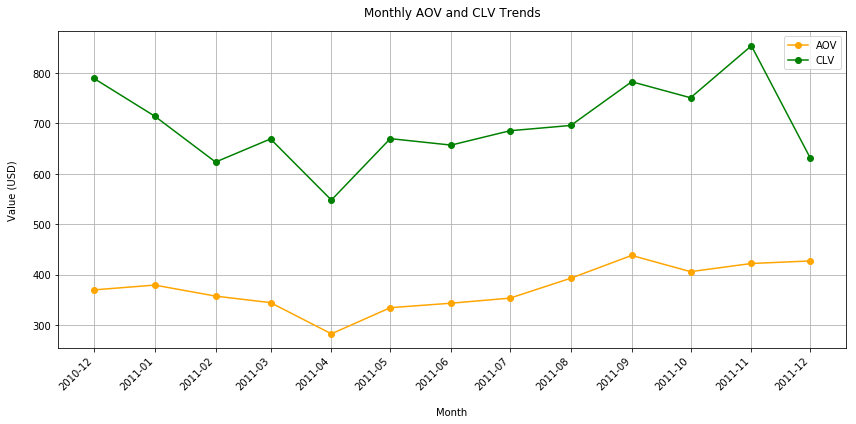

In [289]:
# Calculate Total Revenue and Total Orders per month
monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum()
monthly_orders = df.groupby('InvoiceMonth')['InvoiceNo'].nunique()

# Compute AOV = Total Revenue / Total Orders
monthly_aov = monthly_revenue / monthly_orders

# Compute Average Orders per Customer per month
orders_per_customer = df.groupby(['InvoiceMonth', 'CustomerID'])['InvoiceNo'].nunique()
avg_orders_per_customer = orders_per_customer.groupby('InvoiceMonth').mean()

# Compute CLV = AOV * Avg. Orders per Customer
monthly_clv = monthly_aov * avg_orders_per_customer

# Convert to DataFrame
monthly_metrics = pd.DataFrame({'AOV': monthly_aov, 'CLV': monthly_clv})
print(monthly_metrics.round(2))

# Plot AOV & CLV over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics.index, monthly_aov, label='AOV', color='orange', marker='o')
plt.plot(monthly_metrics.index, monthly_clv, label='CLV', color='green', marker='o')

plt.xlabel('Month', labelpad=15)
plt.ylabel('Value (USD)', labelpad=15)
plt.title('Monthly AOV and CLV Trends', pad=15)

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Average Recency Over Time

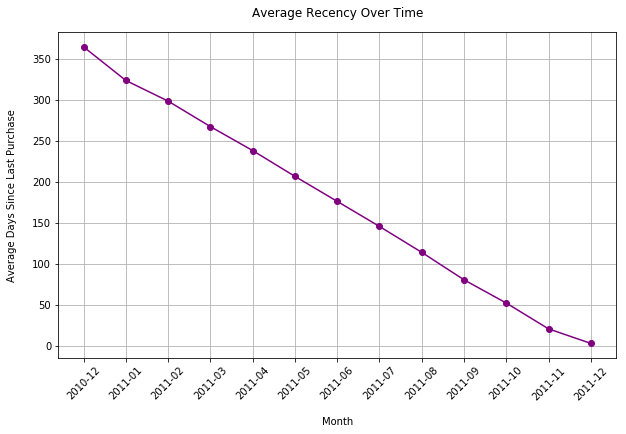

Average Recency: 176.28 days
Lowest Recency: 3.35 days in 2011-12
Highest Recency: 364.30 days in 2010-12
Total Months Analyzed: 13


In [304]:
# Calculate Recency for each Customer
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
max_date = last_purchase['InvoiceDate'].max()
last_purchase['Recency'] = (max_date - last_purchase['InvoiceDate']).dt.days
last_purchase['InvoiceMonth'] = last_purchase['InvoiceDate'].dt.to_period('M')

# Average Recency Over Time
recency_over_time = last_purchase.groupby('InvoiceMonth')['Recency'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(recency_over_time['InvoiceMonth'].astype(str), recency_over_time['Recency'], marker='o', color='purple')
plt.title('Average Recency Over Time', pad=15)
plt.xlabel('Month', labelpad=15)
plt.ylabel('Average Days Since Last Purchase', labelpad=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print Key Metrics
print(f"Average Recency: {recency_over_time['Recency'].mean():.2f} days")
print(f"Lowest Recency: {recency_over_time['Recency'].min():.2f} days in {recency_over_time['InvoiceMonth'][recency_over_time['Recency'].idxmin()]}")
print(f"Highest Recency: {recency_over_time['Recency'].max():.2f} days in {recency_over_time['InvoiceMonth'][recency_over_time['Recency'].idxmax()]}")
print(f"Total Months Analyzed: {len(recency_over_time)}")

## Customer Retention Over Time

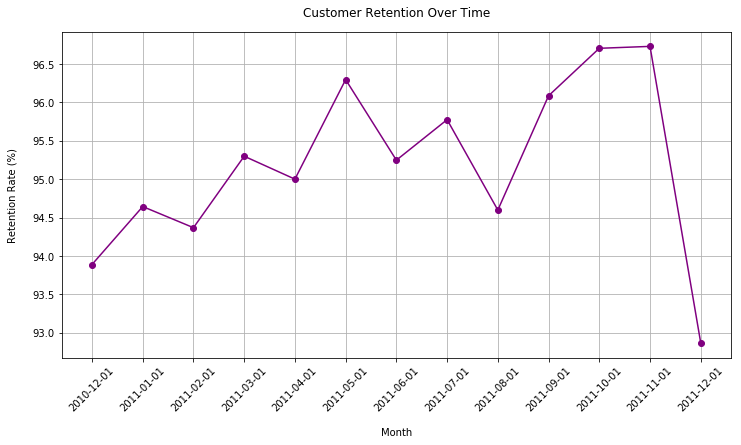

Average Retention Rate: 95.19%
Highest Retention Rate: 96.73% in 2011-11
Lowest Retention Rate: 92.87% in 2011-12
Total Months Analyzed: 13
Max Active Customers in a Month: 1712 in 2011-11
Max Returning Customers in a Month: 1656 in 2011-11


In [303]:
# Get Active and Returning Customers by Month
monthly_customers = df.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()
monthly_customers.rename(columns={'CustomerID': 'Active Customers'}, inplace=True)

df['PreviousMonth'] = df.groupby('CustomerID')['InvoiceMonth'].shift(1)
df['Returned'] = df['InvoiceMonth'] == df['PreviousMonth']

monthly_returning = df[df['Returned']].groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()
monthly_returning.rename(columns={'CustomerID': 'Returning Customers'}, inplace=True)

# Merge and Calculate Retention Rate
retention_data = pd.merge(monthly_customers, monthly_returning, on='InvoiceMonth', how='left').fillna(0)
retention_data['Retention Rate (%)'] = (retention_data['Returning Customers'] / retention_data['Active Customers']) * 100

# Plot the Customer Retention Over Time
plt.figure(figsize=(12, 6))
plt.plot(retention_data['InvoiceMonth'].astype(str), retention_data['Retention Rate (%)'], marker='o', color='purple')
plt.title('Customer Retention Over Time', pad = 15)
plt.xlabel('Month', labelpad=15)
plt.ylabel('Retention Rate (%)', labelpad=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(f"Average Retention Rate: {retention_data['Retention Rate (%)'].mean():.2f}%")
print(f"Highest Retention Rate: {retention_data['Retention Rate (%)'].max():.2f}% in {retention_data['InvoiceMonth'][retention_data['Retention Rate (%)'].idxmax()].strftime('%Y-%m')}")
print(f"Lowest Retention Rate: {retention_data['Retention Rate (%)'].min():.2f}% in {retention_data['InvoiceMonth'][retention_data['Retention Rate (%)'].idxmin()].strftime('%Y-%m')}")
print(f"Total Months Analyzed: {len(retention_data)}")
print(f"Max Active Customers in a Month: {retention_data['Active Customers'].max()} in {retention_data['InvoiceMonth'][retention_data['Active Customers'].idxmax()].strftime('%Y-%m')}")
print(f"Max Returning Customers in a Month: {retention_data['Returning Customers'].max()} in {retention_data['InvoiceMonth'][retention_data['Returning Customers'].idxmax()].strftime('%Y-%m')}")